In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("IMDB-Dataset.csv")

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
postive_reviews = dataset[dataset['sentiment'] == 'positive']['review']
negative_reviews = dataset[dataset['sentiment'] == 'negative']['review']

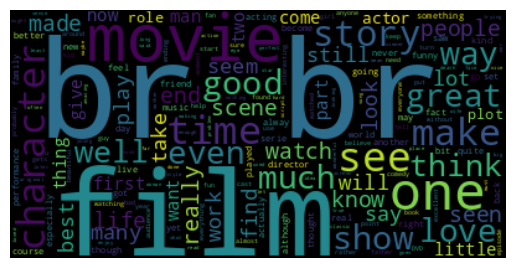

In [7]:
wordcloud = WordCloud().generate(" ".join(postive_reviews))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Preprocessing
## 1. Duplicates
dataset.drop_duplicates(keep='first', inplace=True)

print(dataset.shape)

(49582, 2)


In [9]:
feature = dataset['review']
target = dataset['sentiment']

In [10]:
# Label Encoding
label_encode = {
    "negative" : 0,
    "positive" : 1
}
target = target.replace(label_encode).to_numpy()

/tmp/ipykernel_20682/818860301.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = target.replace(label_encode).to_numpy()


In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

eng_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [13]:
import re

def text_processing(text):
    text = text.lower()

    text = re.sub(r"http\S+","", text) # url tag
    text = re.sub(r'<.*?>', "", text) # html tag
    text = re.sub(r"^a-zA-Z¿]+", " ", text) # emoji

    text = re.sub(r'[^\w\s]', ' ', text)

    text = [word for word in text.split() if word not in eng_stopwords]
    text = " ".join(text)

    text = lemmatizer.lemmatize(text)

    return text

In [14]:
feature_cleaned = feature.apply(text_processing).to_numpy()

In [15]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    feature_cleaned, target, test_size=0.2, stratify=target, shuffle=True, random_state=899
)

In [16]:
# Vectorize
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [18]:
# Apply Logistic Regerssion
log_reg = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1, random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)

In [19]:
log_reg.score(X_test, y_test)

0.8947262276898256

In [23]:
user_input = """I enjoyed the songs, but they didn't capture my attention the way Encanto's did. The story was a bit dull and all over the place. I tried to keep expectations low, and while I liked it, I didn't love it like I did Raya and the last dragon, Encanto, or the other recent Disney films. I feel maybe they spent too much time giving nods to classic films, rather than making the story more interesting.
The style was ok, but I agree it looked like early 2000's dreamworks. Not 2D enough like Princess and the frog, and not 3D enough like the more recent films.
Ralph Breaks the Internet was a better nod to classic Disney than this film"""
user_input

"I enjoyed the songs, but they didn't capture my attention the way Encanto's did. The story was a bit dull and all over the place. I tried to keep expectations low, and while I liked it, I didn't love it like I did Raya and the last dragon, Encanto, or the other recent Disney films. I feel maybe they spent too much time giving nods to classic films, rather than making the story more interesting.\nThe style was ok, but I agree it looked like early 2000's dreamworks. Not 2D enough like Princess and the frog, and not 3D enough like the more recent films.\nRalph Breaks the Internet was a better nod to classic Disney than this film"

In [24]:
def pred_pipe(user_input : str, model, vecotizer):
    processed = text_processing(user_input)

    embed = vecotizer.transform([processed])

    predict = model.predict(embed)

    return predict

In [25]:
pred_pipe(user_input, log_reg, tfidf)

array([1])